In [14]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from astropy import units as u
from planet_cookbook import read_reports as rr
import os
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
import rebound

sol_to_earth = 332946.078
m_pl = 2.793176e-08 * sol_to_earth
m_emb = 2.793176e-07 * sol_to_earth
min_frag_mass = 0.5 * m_pl
G = 6.6743* 10**(-11) #N⋅m2/kg2
M_sun = 1.989e+33 #g
AU = 1.496e+13 #cm

In [15]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

In [16]:
hypatia = pd.read_csv('hypatia.csv')
FeMg = 10**((hypatia['Fe'] + 7.45) - (hypatia['Mg'] + 7.54))
SiMg = 10**((hypatia['Si'] + 7.52) - (hypatia['Mg'] + 7.54))

def get_CMF_star(FeMg, SiMg):
    m_Fe = 55.845
    m_SiO2 = 60.08 #g/mol
    m_MgO = 40.3044
    
    CMF = (FeMg * m_Fe)/(FeMg*m_Fe + SiMg * m_SiO2 + m_MgO)
    return CMF

CMF_stars = get_CMF_star(FeMg, SiMg)

In [17]:
plt.hist(CMF_stars)
plt.xlabel("CMF_star")
plt.title('CMF stars based on Hypatia Catalog')

Text(0.5, 1.0, 'CMF stars based on Hypatia Catalog')

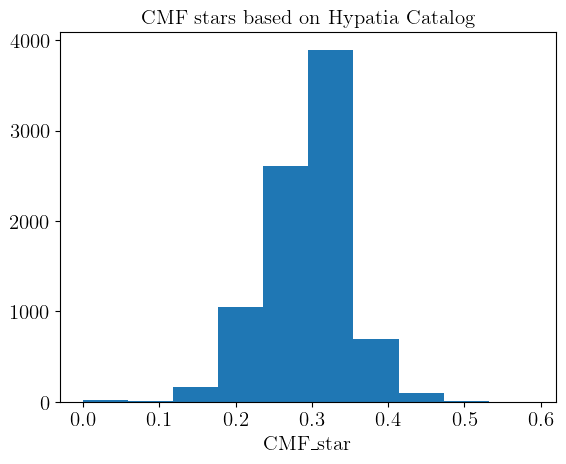

RuntimeError: latex was not able to process the following string:
b'+1\\u03c3 (0.35)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpyou5kwjg 0e4031a7a8db1dbff663a12837c49cc2bf6fe5b9c14eb82fdc3be8e4928a816c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./0e4031a7a8db1dbff663a12837c49cc2bf6fe5b9c14eb82fdc3be8e4928a816c.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>
(/usr/local/texlive/2025/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(/usr/local/texlive/2025/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2025/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2025/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2025/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2025/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2025/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2025/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2025/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2025/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2025/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2025/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2025/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2025/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 0e4031a7a8db1dbff663a12837c49cc2bf6fe5b9c14eb82fdc3be8e4928a816c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character σ (U+03C3)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily +1σ
                     (0.35)}%
No pages of output.
Transcript written on tmpyou5kwjg/0e4031a7a8db1dbff663a12837c49cc2bf6fe5b9c14eb
82fdc3be8e4928a816c.log.




<Figure size 600x400 with 1 Axes>

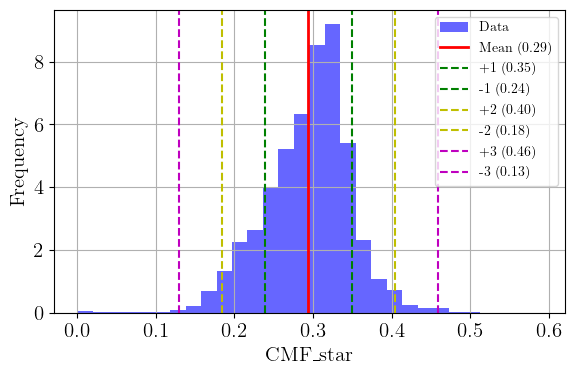

Mean: 0.29
1-Sigma (+): 0.35, (-): 0.24
2-Sigma (+): 0.40, (-): 0.18
3-Sigma (+): 0.46, (-): 0.13


In [19]:
# Generate a sample dataset (replace with your actual data)
np.random.seed(42)  # for reproducibility
df = CMF_stars

# 1. Calculate the mean and standard deviation
mean_value = df.mean()
std_dev = df.std()

# 2. Calculate the sigma values
one_sigma_plus = mean_value + std_dev
one_sigma_minus = mean_value - std_dev
two_sigma_plus = mean_value + 2 * std_dev
two_sigma_minus = mean_value - 2 * std_dev
three_sigma_plus = mean_value + 3 * std_dev
three_sigma_minus = mean_value - 3 * std_dev

# 3. Plot the histogram
plt.figure(figsize=(6, 4))  # Adjust figure size for better readability
plt.hist(df, bins=30, density=True, alpha=0.6, color='b', label='Data')  # More bins for better visualization

# 4. Plot the mean and sigma lines
plt.axvline(mean_value, color='r', linestyle='-', linewidth=2, label=f'Mean ({mean_value:.2f})')
plt.axvline(one_sigma_plus, color='g', linestyle='--', linewidth=1.5, label= f'+1 ({one_sigma_plus:.2f})')
plt.axvline(one_sigma_minus, color='g', linestyle='--', linewidth=1.5, label=f'-1 ({one_sigma_minus:.2f})')
plt.axvline(two_sigma_plus, color='y', linestyle='--', linewidth=1.5, label=f'+2 ({two_sigma_plus:.2f})')
plt.axvline(two_sigma_minus, color='y', linestyle='--', linewidth=1.5, label=f'-2 ({two_sigma_minus:.2f})')
plt.axvline(three_sigma_plus, color='m', linestyle='--', linewidth=1.5, label=f'+3 ({three_sigma_plus:.2f})')
plt.axvline(three_sigma_minus, color='m', linestyle='--', linewidth=1.5, label=f'-3 ({three_sigma_minus:.2f})')

# 5. Add labels and title
plt.xlabel('CMF_star')
plt.ylabel('Frequency')
plt.legend()  # Show the legend
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout() # Adjust the layout so elements don't overlap
plt.show()

# 6. Print the calculated values
print(f"Mean: {mean_value:.2f}")
print(f"1-Sigma (+): {one_sigma_plus:.2f}, (-): {one_sigma_minus:.2f}")
print(f"2-Sigma (+): {two_sigma_plus:.2f}, (-): {two_sigma_minus:.2f}")
print(f"3-Sigma (+): {three_sigma_plus:.2f}, (-): {three_sigma_minus:.2f}")


In [20]:
df.max()

np.float64(0.5908514317909549)

<>:26: SyntaxWarning: invalid escape sequence '\%'
<>:26: SyntaxWarning: invalid escape sequence '\%'
/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_89364/255535610.py:26: SyntaxWarning: invalid escape sequence '\%'
  plt.axvline(lower_95, color='blue', linewidth=3, alpha = 0.8, label=f'95\% ({lower_95:.2f} - {upper_95:.2f})')


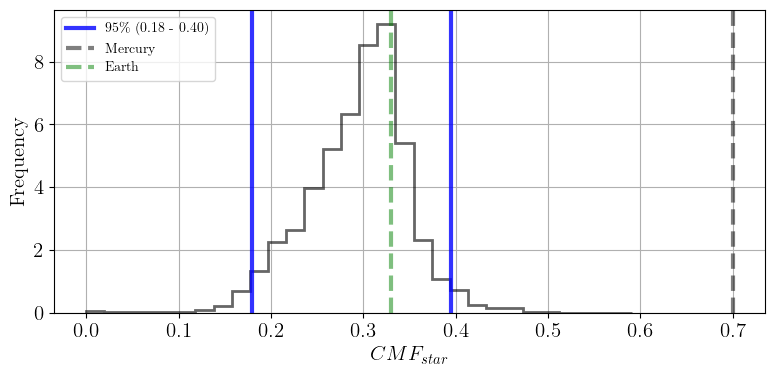

68% of data: 0.24 – 0.34
95% of data: 0.18 – 0.40
99.7% of data: 0.03 – 0.47


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is a 1D pandas Series or numpy array
df = CMF_stars  # Replace with your actual data

# Sort data
sorted_data = np.sort(df)

# Calculate empirical percentile ranges
lower_68, upper_68 = np.percentile(df, [16, 84])
lower_95, upper_95 = np.percentile(df, [2.5, 97.5])
lower_997, upper_997 = np.percentile(df, [0.15, 99.85])
median = np.median(df)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(df, bins=30, density=True, alpha=0.6, histtype='step', color = 'black', linewidth=2)

# Plot median
#plt.axvline(median, color='r', linestyle='-', linewidth=2, label=f'Median ({median:.2f})')

# Plot percentile-based regions
#plt.axvline(lower_68, color='red', linestyle='--', linewidth=1.5, alpha = 0.6, label=f'68% ({lower_68:.2f}–{upper_68:.2f})')
#plt.axvline(upper_68, color='red', linestyle='--', linewidth=1.5, alpha = 0.6)
plt.axvline(lower_95, color='blue', linewidth=3, alpha = 0.8, label=f'95\% ({lower_95:.2f} - {upper_95:.2f})')
plt.axvline(upper_95, color='blue', linewidth=3, alpha = 0.8)
#plt.axvline(lower_997, color='magenta', linestyle='--', linewidth=1.5, alpha = 0.6, label=f'99.7% ({lower_997:.2f}–{upper_997:.2f})')
#plt.axvline(upper_997, color='magenta', linestyle='--', linewidth=1.5, alpha = 0.6)
plt.axvline(0.7, color='black', linestyle='--', alpha = 0.5, linewidth=3, label = 'Mercury')
plt.axvline(0.33, color='green', linestyle='--', alpha = 0.5, linewidth=3, label = 'Earth')

# Labels, legend, and grid
plt.xlabel(r'$CMF_{star}$')
plt.ylabel('Frequency')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("histogram_hypatia.pdf", dpi = 300)
plt.show()

# Print ranges
print(f"68% of data: {lower_68:.2f} – {upper_68:.2f}")
print(f"95% of data: {lower_95:.2f} – {upper_95:.2f}")
print(f"99.7% of data: {lower_997:.2f} – {upper_997:.2f}")
